<h2>Module 1: Python</h2>

<h3>Preprocessing</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [7]:
df[df.duplicated()].shape[0]

0

In [8]:
df.drop('customerID',axis=1,inplace=True)

<h3>Exploratory Data Analysis</h3>

In [9]:
churn_counts = df['Churn'].value_counts()
fig = go.Figure(data=[go.Pie(labels=churn_counts.index, values=churn_counts.values, hole=0.3)])
fig.update_layout(title='Churn Distribution')
po.iplot(fig)

The pie chart shows the proportion of customers who have churned versus those who haven't. This gives us an overall idea of the churn rate in the dataset.Slight data imbalance can be seen.

In [10]:
fig_tenure = px.box(df, x='Churn', y='tenure', title='Box plot of Tenure by Churn Status')
fig_tenure.show()

fig_monthly = px.box(df, x='Churn', y='MonthlyCharges', title='Box plot of Monthly Charges by Churn Status')
fig_monthly.show()

fig_total = px.box(df, x='Churn', y='TotalCharges', title='Box plot of Total Charges by Churn Status')
fig_total.show()

1. Tenure: Churned customers tend to have shorter tenures compared to non-churned customers.
2. Monthly Charges: Churned customers tend to have slightly higher monthly charges.
3. Total Charges: Non-churned customers have a higher range of total charges due to longer tenures.

Since there is no outlier present in numeric dataset so we don't need to do any kind of outlier treatment.

In [11]:
senior_citizen_counts = df['SeniorCitizen'].value_counts()
fig = go.Figure(data=[go.Pie(labels=senior_citizen_counts.index, values=senior_citizen_counts.values, hole=0.3)])
fig.update_layout(title='Senior Citizen Distribution')
po.iplot(fig)

83.8 % of the customers are senior citizen and only 16.2% are adult customer.

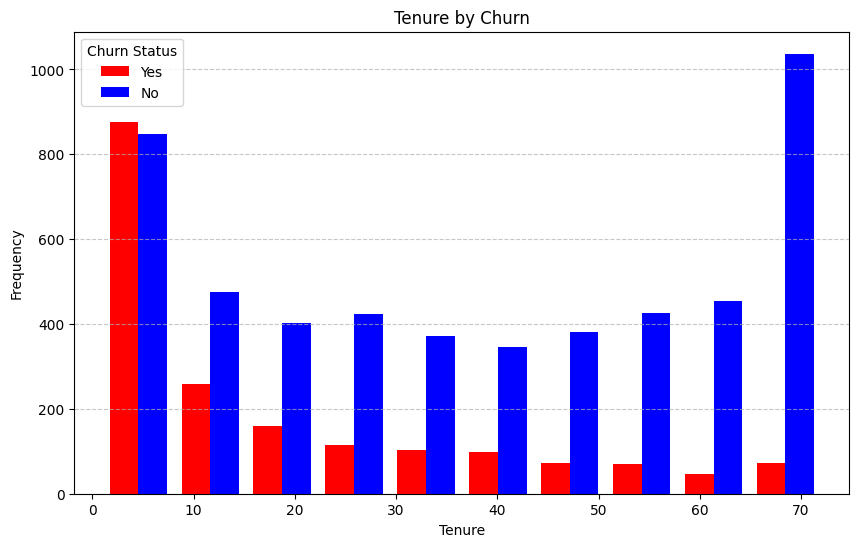

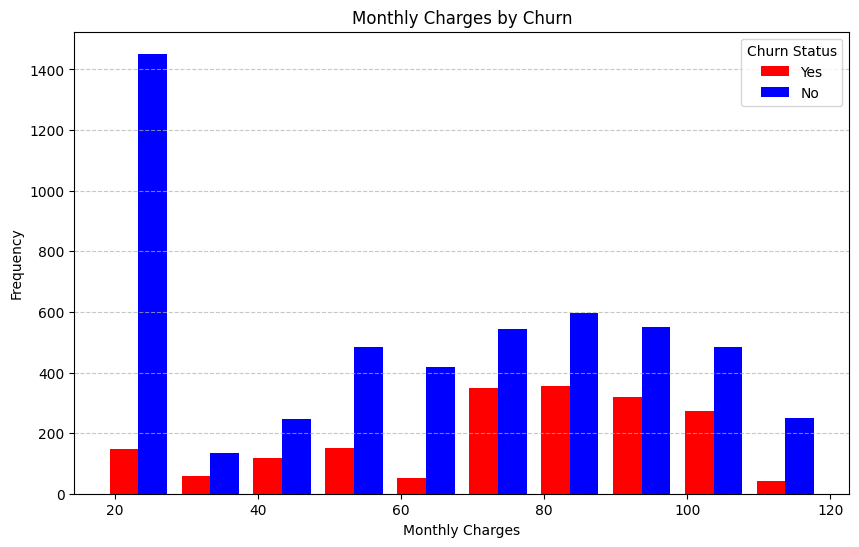

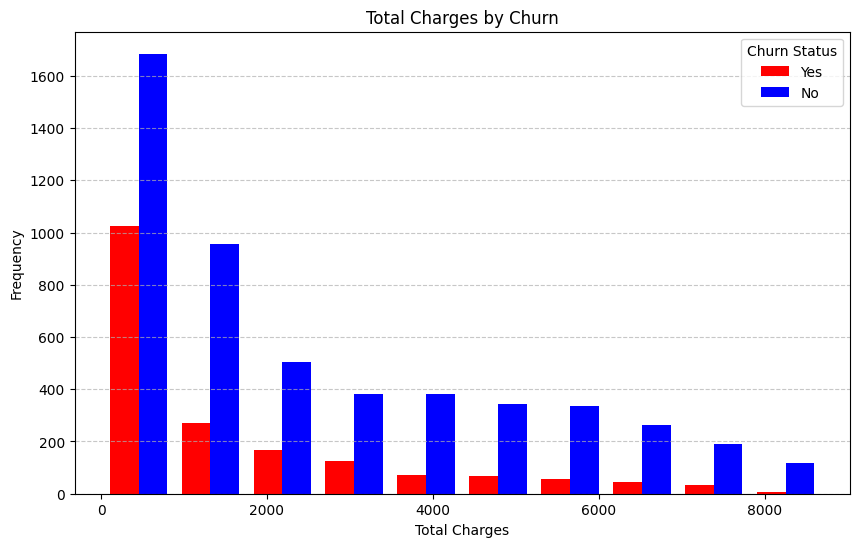

In [12]:

churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend(title='Churn Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend(title='Churn Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.legend(title='Churn Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. Tenure: A higher frequency of churned customers have shorter tenures.
2. Monthly Charges: Higher monthly charges are more common among churned customers.
3. Total Charges: Churned customers have lower total charges, correlating with shorter tenures.

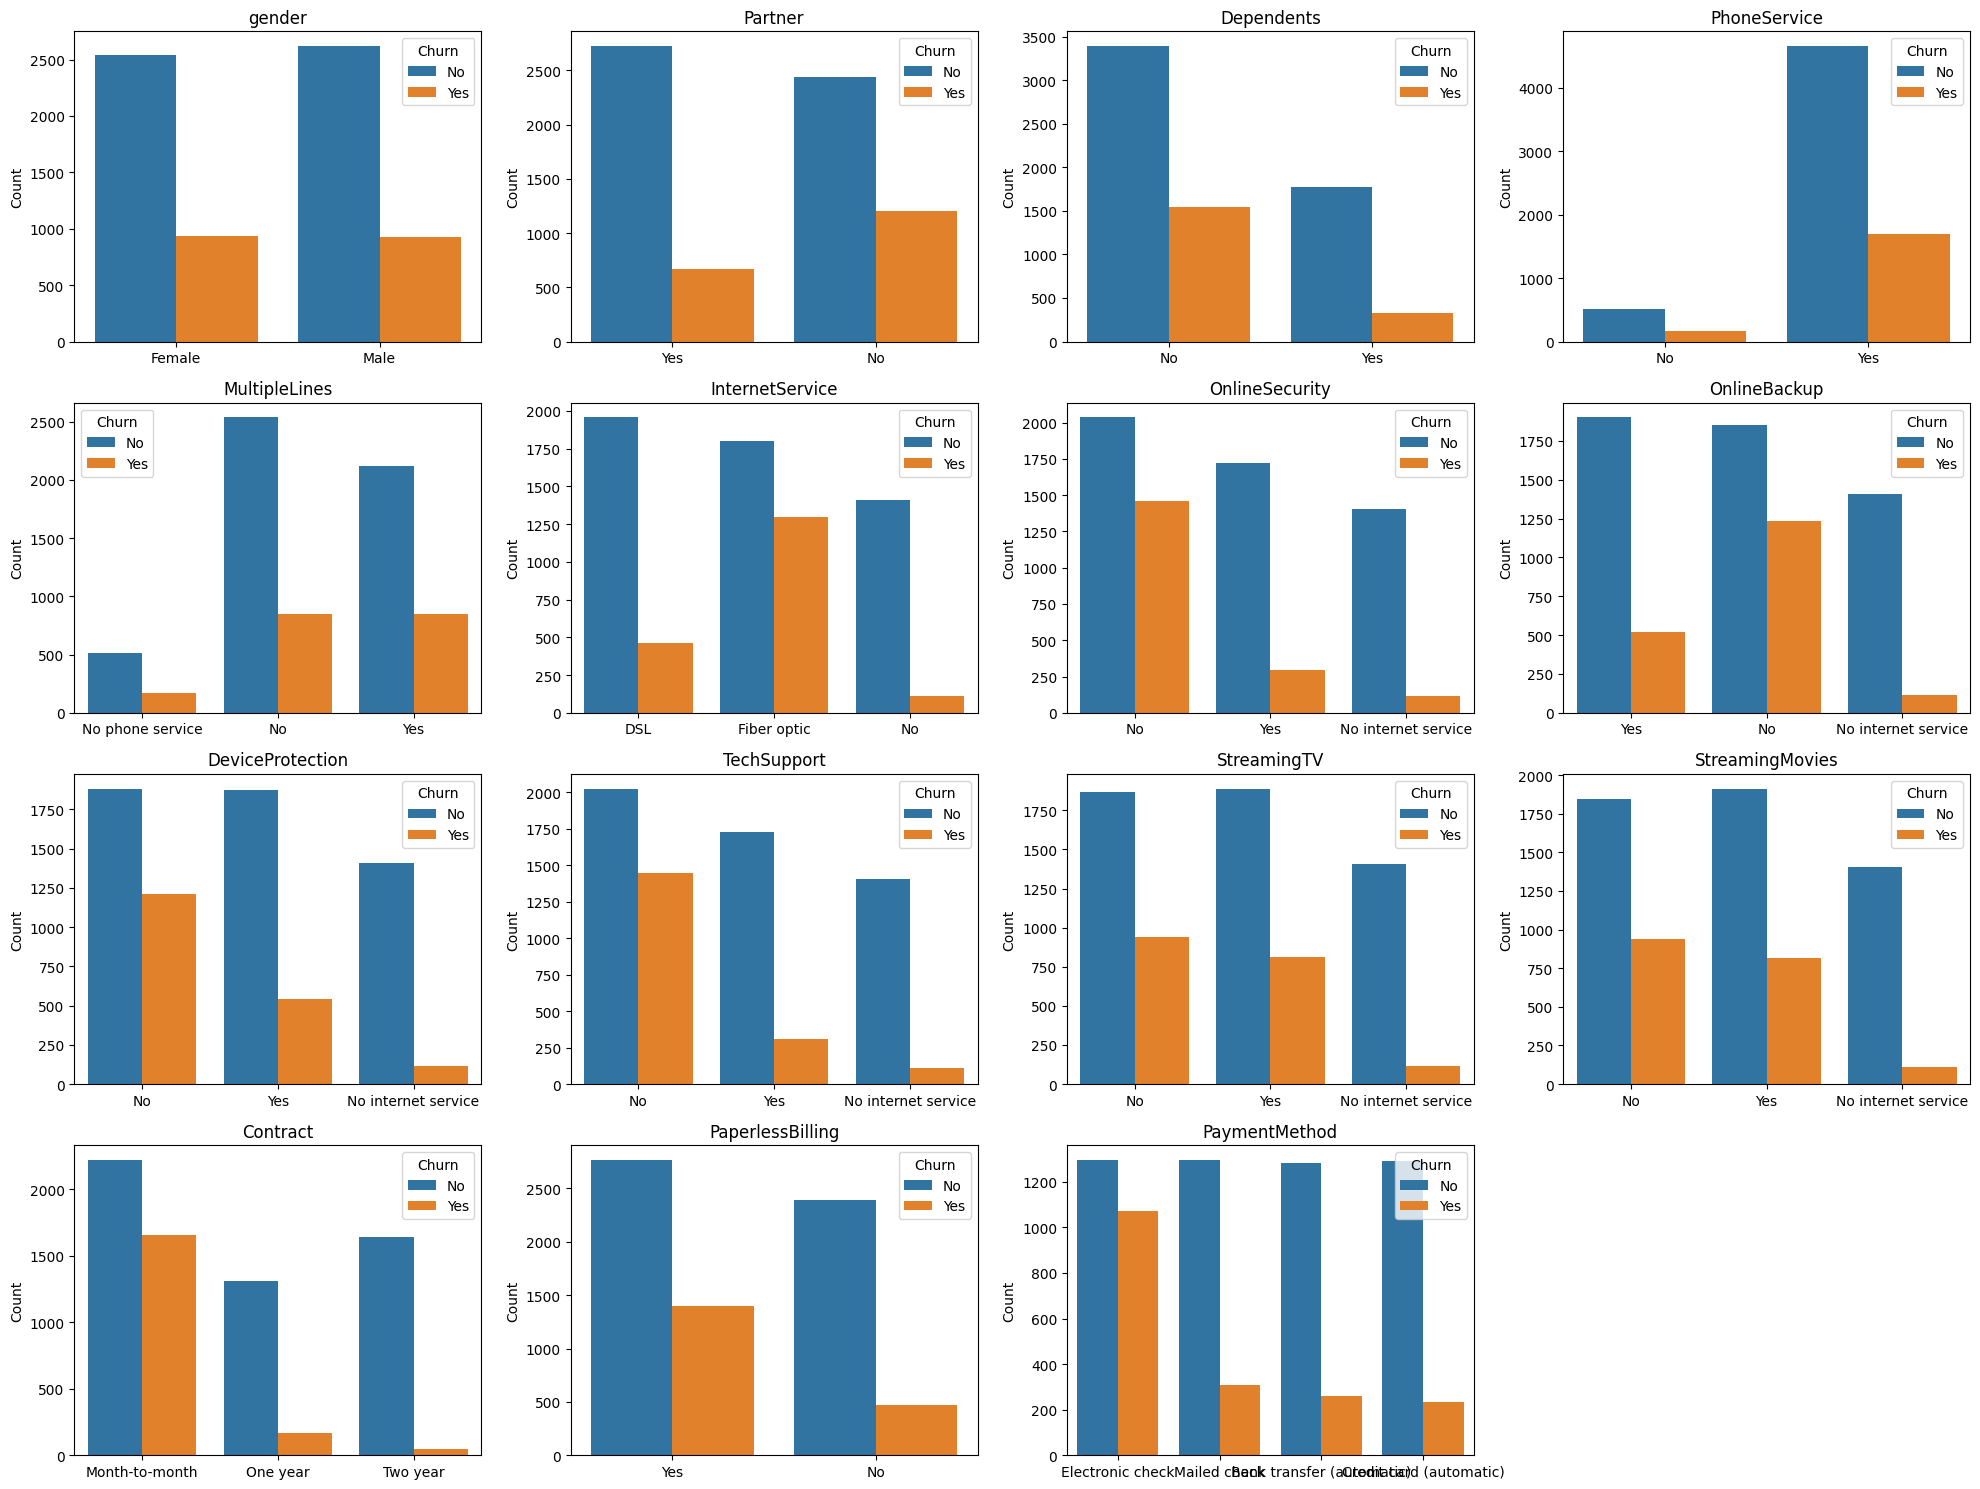

In [13]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                        'PaymentMethod']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

1. Contract type significantly impacts churn rates; customers with month-to-month contracts are more likely to churn compared to those with one or two-year contracts.
2. Features like 'InternetService', 'OnlineSecurity', 'TechSupport', and 'StreamingTV' show visible differences in churn rates, indicating their potential importance in predicting churn.

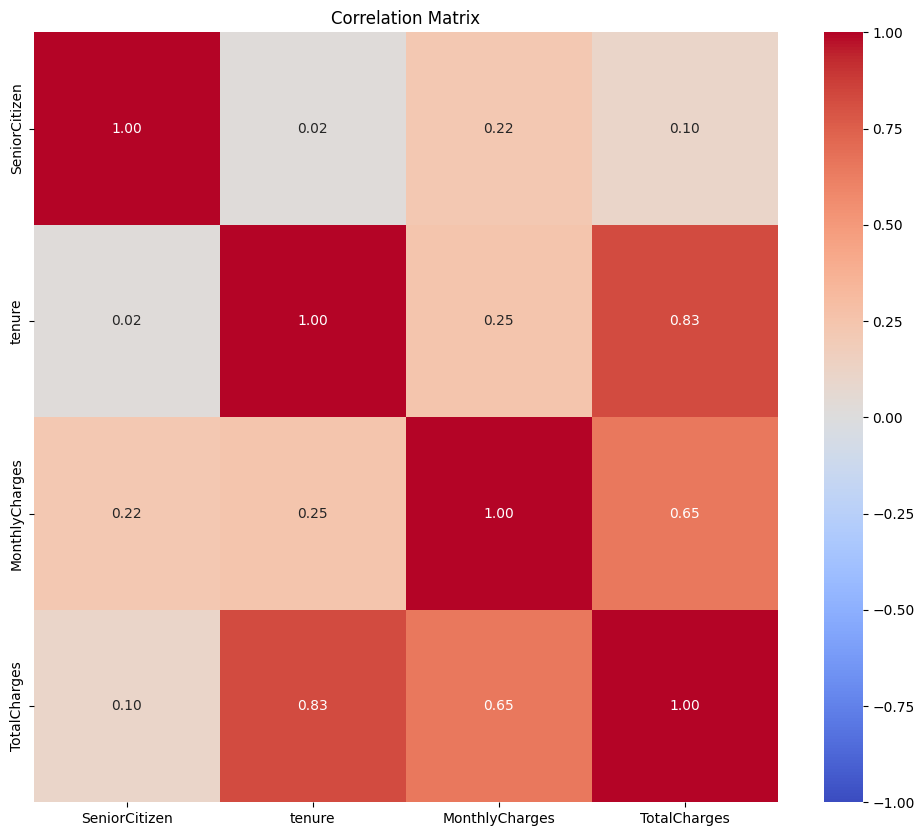

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Tenure is strongly correlated with total charges, which is expected as longer tenures accumulate higher charges.

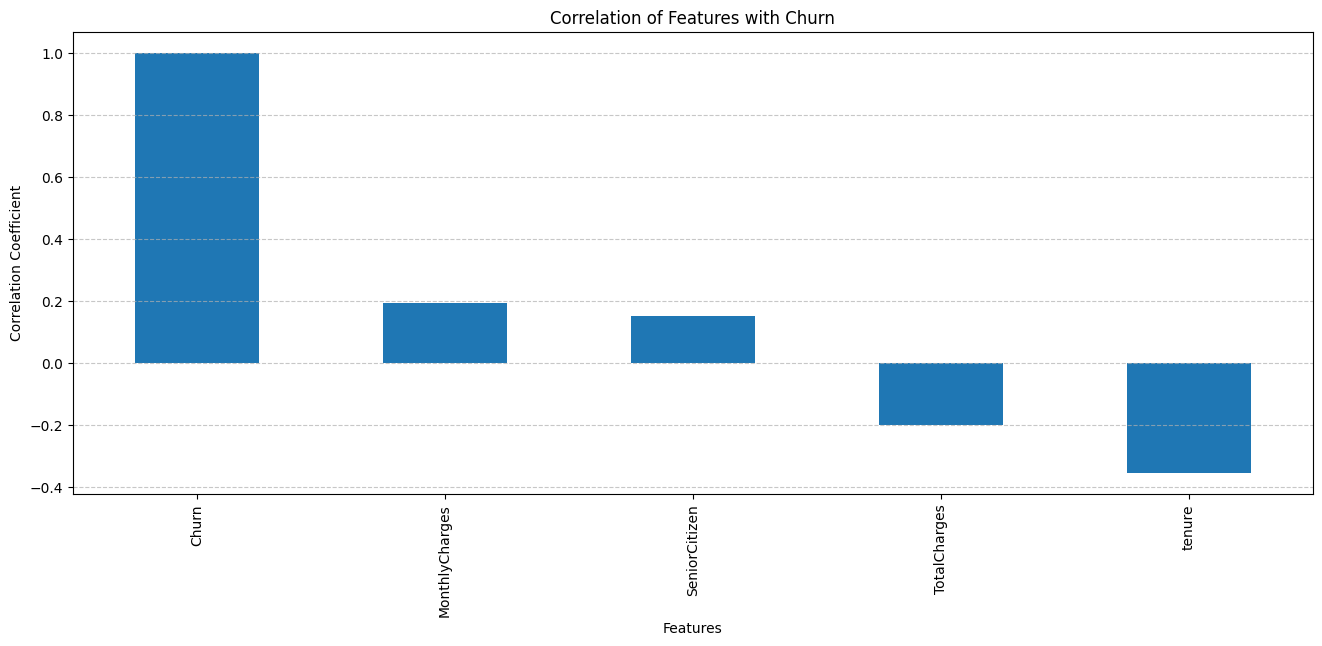

In [16]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

correlation_with_churn = df.corr()["Churn"].sort_values(ascending=False)

plt.figure(figsize=(16, 6))
correlation_with_churn.plot(kind="bar")
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analysis:
1. Tenure: Customers with longer tenure are less likely to churn. This negative correlation indicates that the longer a customer stays with the company, the lower the likelihood of them leaving.
2. Monthly Charges: Higher monthly charges are slightly associated with a higher likelihood of churn. This suggests that customers who pay more per month might be more inclined to leave, possibly due to cost sensitivity.
3. Total Charges: Total charges are negatively correlated with churn, indicating that customers who have higher total charges and thus have been with the service longer are less likely to churn.
4. Senior Citizen: Being a senior citizen has a slight positive correlation with churn, suggesting that older customers may be marginally more likely to leave.
5. And Other features like PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection and etc all have varying levels of correlation with churn.

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for feature in df.select_dtypes(include='object').columns:
    df[feature]=encoder.fit_transform(df[feature])

In [18]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


<h3>Feature Engineering</h3>

In [19]:
x=df.drop("Churn",axis=1)
y=df["Churn"]
x.shape

(7032, 19)

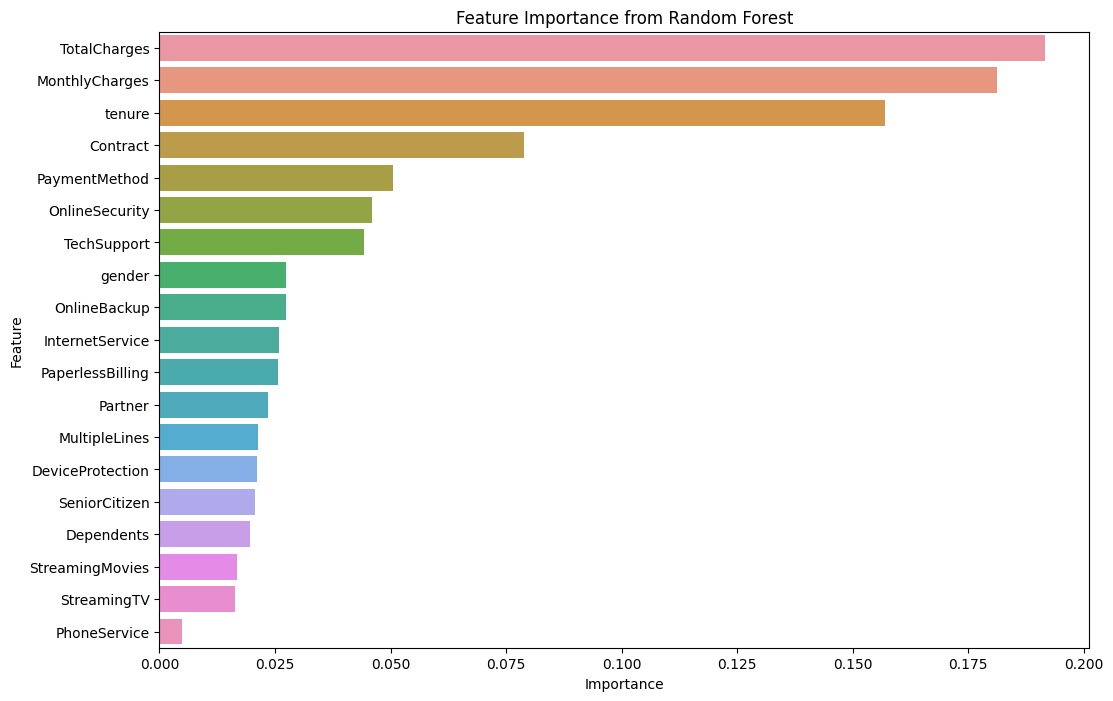

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x, y)

importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()

In [21]:
top_k = 11
selected_features = feature_importances.head(top_k)['Feature']

print("Selected features:", selected_features.tolist())

Selected features: ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'gender', 'OnlineBackup', 'InternetService', 'PaperlessBilling']


In [22]:
x = x[selected_features]
print(x.shape)
x.to_csv('processed_data.csv', index=False)

(7032, 11)


<h2>Module 2: AI Algorithm</h2>

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5625, 11), (5625,), (1407, 11), (1407,))

In [24]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
import time
import psutil

import warnings
warnings.filterwarnings('ignore')

def evaluate_model_performance(model, train_data, train_labels, test_data, y_test):
    # Measure CPU usage and training time
    cpu_usage_before = psutil.cpu_percent(interval=None)
    start_time = time.time()
    
    # Train the model
    model.fit(train_data, train_labels)
    
    # Calculate training time and CPU usage
    training_time = time.time() - start_time
    cpu_usage_after = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_usage_after - cpu_usage_before
    
    # Make predictions
    prediction = model.predict(test_data)
    
    # Print evaluation metrics
    print("Validation Accuracy: {:.2f}".format(accuracy_score(y_test, prediction)))
    print("Precision Score: {:.2f}".format(precision_score(y_test, prediction)))
    print("Recall Score: {:.2f}".format(recall_score(y_test, prediction)))
    print("F1 Score: {:.2f}".format(f1_score(y_test, prediction)))
    print("ROC-AUC Score: {:.2f}".format(roc_auc_score(y_test, prediction)))
    print(classification_report(y_test, prediction))
    
    # Print training time and CPU usage
    print("Training Time: {:.2f} seconds".format(training_time))
    print("CPU Usage: {:.2f}%".format(cpu_usage))

In [25]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()

In [26]:
evaluate_model_performance(rand_forest, x_train, y_train, x_test, y_test)

Validation Accuracy: 0.79
Precision Score: 0.63
Recall Score: 0.49
F1 Score: 0.55
ROC-AUC Score: 0.69
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Training Time: 0.69 seconds
CPU Usage: 19.10%


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier( )

In [28]:
evaluate_model_performance(gbc_model, x_train, y_train, x_test, y_test)

Validation Accuracy: 0.79
Precision Score: 0.64
Recall Score: 0.50
F1 Score: 0.56
ROC-AUC Score: 0.70
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Training Time: 0.69 seconds
CPU Usage: 9.90%


In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [30]:
evaluate_model_performance(dt_model, x_train, y_train, x_test, y_test)

Validation Accuracy: 0.73
Precision Score: 0.49
Recall Score: 0.52
F1 Score: 0.50
ROC-AUC Score: 0.66
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.49      0.52      0.50       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407

Training Time: 0.03 seconds
CPU Usage: 68.70%


In [31]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000) 

In [32]:
evaluate_model_performance(logreg_model, x_train, y_train, x_test, y_test)

Validation Accuracy: 0.79
Precision Score: 0.61
Recall Score: 0.55
F1 Score: 0.58
ROC-AUC Score: 0.71
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.61      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Training Time: 0.18 seconds
CPU Usage: 4.80%


In [33]:
from sklearn.svm import SVC
svc_model = SVC(random_state=42)

In [34]:
evaluate_model_performance(svc_model, x_train, y_train, x_test, y_test)

Validation Accuracy: 0.73
Precision Score: 0.00
Recall Score: 0.00
F1 Score: 0.00
ROC-AUC Score: 0.50
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407

Training Time: 1.54 seconds
CPU Usage: 13.80%


<h4>Analysis without Boosting:</h4>

The Gradient Boosting Classifier is the best choice due to its high recall and F1 score and less CPU usage, effectively balancing precision and recall. The Logistic Regression model also performs well, especially in ROC-AUC, indicating good class separation. The Decision Tree and SVM shows the weakest performance across metrics.

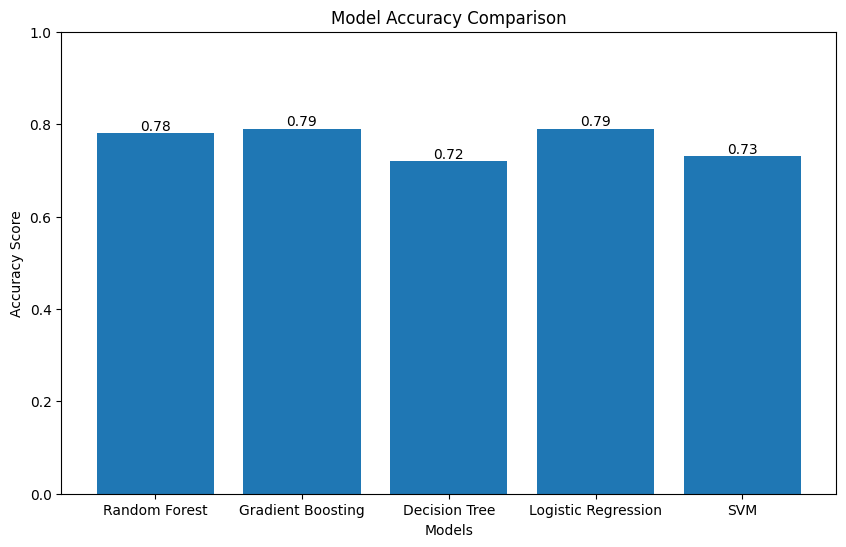

In [35]:
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Logistic Regression', 'SVM']
accuracies = [0.78, 0.79, 0.72, 0.79, 0.73]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', 
             ha='center', va='bottom')


plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  
plt.show()


The Model performance is not upto the mark , so will apply technique in order to increase accuracy.
The one major reason is imbalance data.

In [38]:
from imblearn.combine import SMOTEENN
smote=SMOTEENN()

x_st,y_st=smote.fit_resample(x,y)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_st,y_st,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4600, 11), (4600,), (1151, 11), (1151,))

 Model with Balanced Dataset and performance hyper parameter tuning using RandomSearchCV

In [40]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'n_estimators':[40,80,120,160,200],
            'max_depth':[2,4,6,8,10],
            "criterion":['gini'],
            "random_state":[27,42,43]
            }
random_search_cv=RandomizedSearchCV( estimator=RandomForestClassifier(), param_distributions=param_grid,n_iter=12,cv=5,scoring='f1',verbose=1)
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=12,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [40, 80, 120, 160, 200],
                                        'random_state': [27, 42, 43]},
                   scoring='f1', verbose=1)

In [41]:
random_search_cv.best_params_

{'random_state': 27, 'n_estimators': 80, 'max_depth': 10, 'criterion': 'gini'}

In [42]:
rf_final_model=random_search_cv.best_estimator_

Random Forest After Smotenn and hypertuning

In [43]:
evaluate_model_performance(rf_final_model, x_train, y_train, x_test, y_test)

Validation Accuracy: 0.94
Precision Score: 0.94
Recall Score: 0.96
F1 Score: 0.95
ROC-AUC Score: 0.94
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       544
           1       0.94      0.96      0.95       607

    accuracy                           0.94      1151
   macro avg       0.94      0.94      0.94      1151
weighted avg       0.94      0.94      0.94      1151

Training Time: 0.29 seconds
CPU Usage: 11.90%


In [44]:
param_grid_gbc = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'random_state': [27, 42, 43]
}


In [45]:
random_search_cv_gbc = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_grid_gbc,
    n_iter=12,
    cv=5,
    scoring='f1',
    verbose=1,
    random_state=42
)
random_search_cv_gbc.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=12,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200],
                                        'random_state': [27, 42, 43],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [46]:
gb_final_model=random_search_cv_gbc.best_estimator_

GradientBoostingClassifier After Smotenn and hypertuning


In [47]:
evaluate_model_performance(gb_final_model, x_train, y_train, x_test, y_test)

Validation Accuracy: 0.96
Precision Score: 0.97
Recall Score: 0.96
F1 Score: 0.96
ROC-AUC Score: 0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       544
           1       0.97      0.96      0.96       607

    accuracy                           0.96      1151
   macro avg       0.96      0.96      0.96      1151
weighted avg       0.96      0.96      0.96      1151

Training Time: 1.75 seconds
CPU Usage: 22.80%


In [48]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'random_state': [27, 42, 43]
}


In [49]:
random_search_cv_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_grid_dt,
    n_iter=12,
    cv=5,
    scoring='f1',
    verbose=1,
    random_state=42
)

random_search_cv_dt.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=12,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'random_state': [27, 42, 43]},
                   random_state=42, scoring='f1', verbose=1)

DecisionTree After Smotenn and hypertuning

In [51]:
evaluate_model_performance(random_search_cv_dt, x_train, y_train, x_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Validation Accuracy: 0.92
Precision Score: 0.94
Recall Score: 0.91
F1 Score: 0.92
ROC-AUC Score: 0.92
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       544
           1       0.94      0.91      0.92       607

    accuracy                           0.92      1151
   macro avg       0.92      0.92      0.92      1151
weighted avg       0.92      0.92      0.92      1151

Training Time: 0.95 seconds
CPU Usage: 3.60%


In [52]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'random_state': [27, 42, 43]
}

In [53]:
random_search_cv_lr = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=param_grid_lr,
    n_iter=12,
    cv=5,
    scoring='f1',
    verbose=1,
    random_state=42
)
random_search_cv_lr.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=12,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [27, 42, 43],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='f1', verbose=1)

LogisticRegression After Smotenn and HyperTuning

In [54]:
evaluate_model_performance(random_search_cv_lr, x_train, y_train, x_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Validation Accuracy: 0.91
Precision Score: 0.91
Recall Score: 0.93
F1 Score: 0.92
ROC-AUC Score: 0.91
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       544
           1       0.91      0.93      0.92       607

    accuracy                           0.91      1151
   macro avg       0.91      0.91      0.91      1151
weighted avg       0.91      0.91      0.91      1151

Training Time: 8.02 seconds
CPU Usage: 25.20%


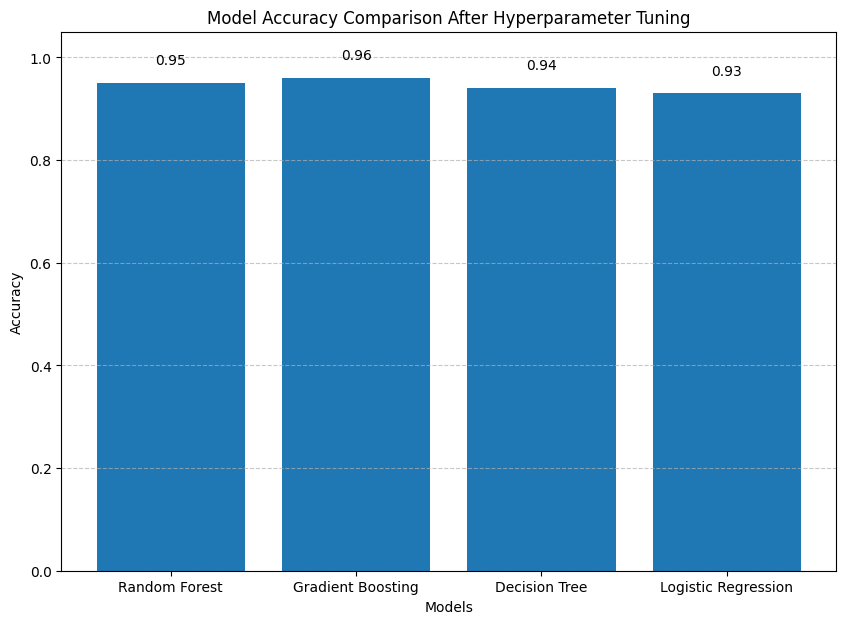

In [55]:
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Logistic Regression']
accuracies = [0.95, 0.96, 0.94, 0.93]

plt.figure(figsize=(10, 7))
bars = plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison After Hyperparameter Tuning')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       544
           1       0.97      0.96      0.96       607

    accuracy                           0.96      1151
   macro avg       0.96      0.96      0.96      1151
weighted avg       0.96      0.96      0.96      1151

Gradient Boosting Confusion Matrix:
[[524  20]
 [ 23 584]]


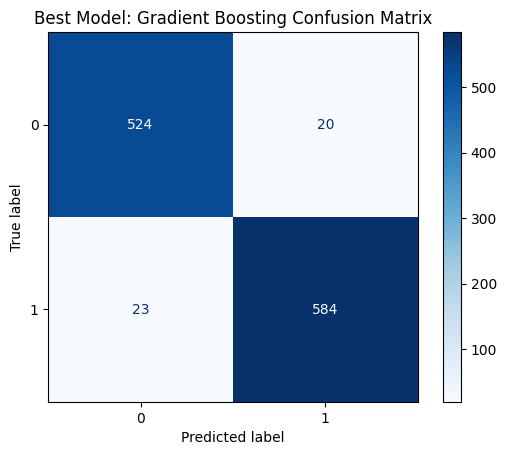

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
def evaluate_gradient_boosting_performance(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    report = classification_report(y_test, y_pred)
    print(f"Gradient Boosting Classification Report:\n{report}")
    
    print(f"Gradient Boosting Confusion Matrix:\n{cm}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Best Model: Gradient Boosting Confusion Matrix')
    plt.show()

evaluate_gradient_boosting_performance(gb_final_model, y_test, y_test)

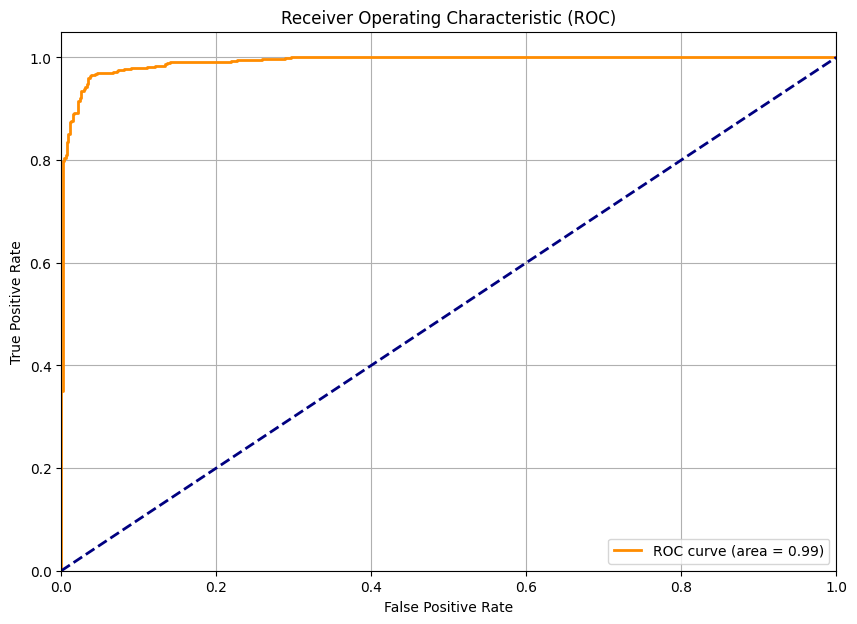

In [57]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
   
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc_curve(gb_final_model, x_test, y_test)


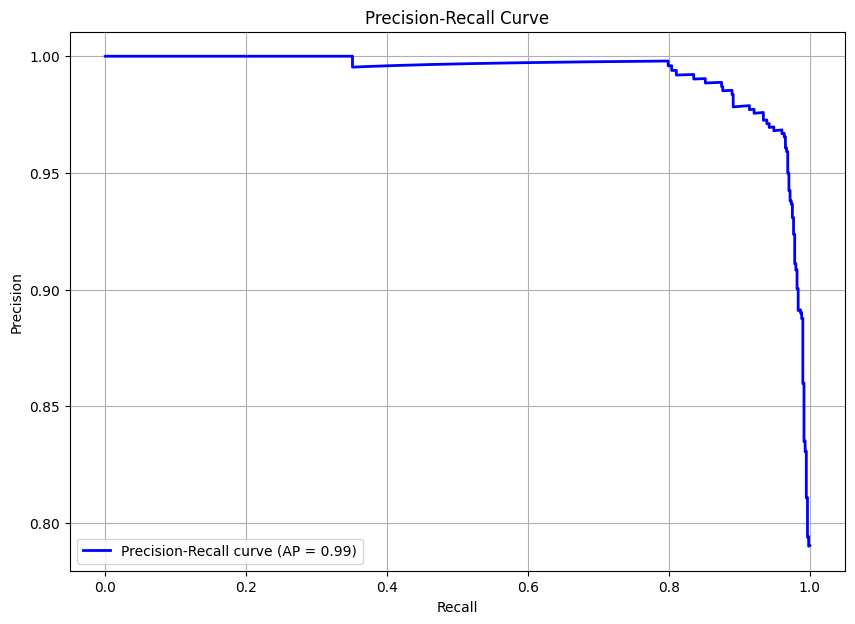

In [58]:

from sklearn.metrics import precision_recall_curve, average_precision_score
def plot_precision_recall_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    average_precision = average_precision_score(y_test, y_prob)
    
    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

plot_precision_recall_curve(gb_final_model, x_test, y_test)


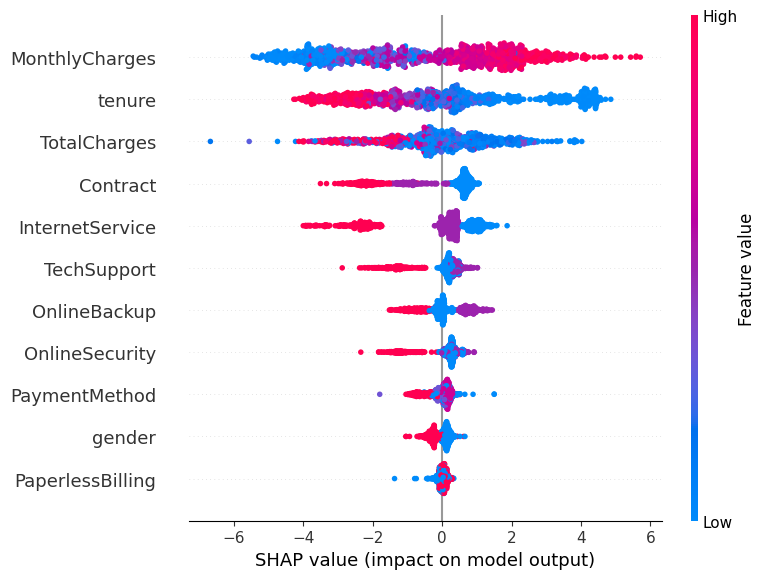

In [60]:
import shap

explainer = shap.Explainer(gb_final_model, x_train)  

shap_values = explainer(x_test,check_additivity=False)

shap.summary_plot(shap_values, x_test)

In [61]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, x_test.iloc[0])


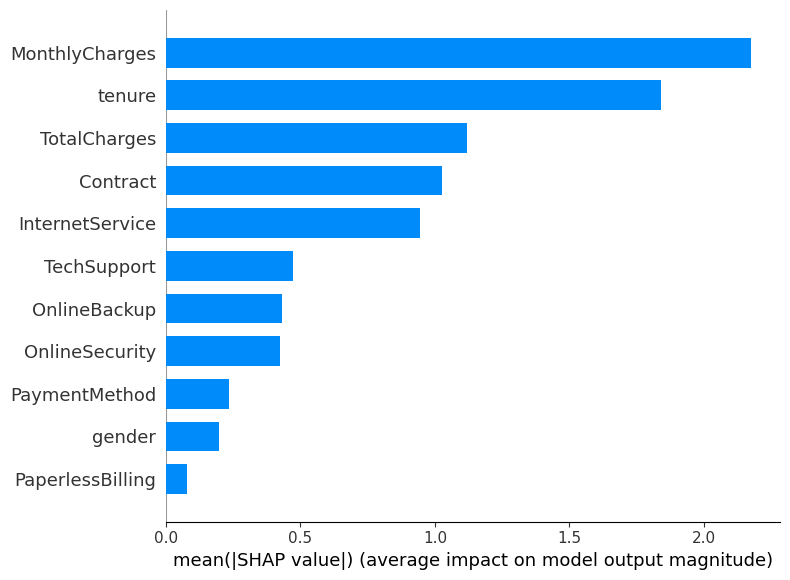

In [62]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [63]:
gb_final_model.fit(x, y)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=200,
                           random_state=42, subsample=0.8)

In [64]:
y_pred = gb_final_model.predict(x)
y_pred_proba = gb_final_model.predict_proba(x)[:, 1]

results_df = pd.DataFrame({
    'customer_id': df.index,
    'actual': y,
    'predicted': y_pred,
    'prediction_probability': y_pred_proba
})

results_df.to_csv('prediction_results.csv', index=False)

In [65]:
import joblib
joblib.dump(gb_final_model, 'model.joblib')

['model.joblib']

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [67]:
model = joblib.load('model.joblib')

input_data = np.array([
    [1, 1, 10, 1, 1, 1, 0, 0, 0, 1, 1] 
])

prediction = model.predict(input_data)

print(f'Prediction: {prediction[0]}')


Prediction: 0
